In [1]:
import main 
import matplotlib.pyplot as plt
%matplotlib inline  
import analyse_tool 
import numpy as np
import simulation
from timeit import Timer

# Profling:

in respect to length

In [2]:
time_python=[]
time_cpp=[]
for i in np.logspace(1,21,num=21,base=2):
    timec=Timer(lambda: analyse_tool.Analyse(D=2,particles=1,length=int(i),alpha=0.5,dt=1,version='cpp').compute_trajectory())
    timep=Timer(lambda: analyse_tool.Analyse(D=2,particles=1,length=int(i)*3,alpha=0.5,dt=1).compute_trajectory())
    time_python.append(timep.timeit(number=1))
    time_cpp.append(timec.timeit(number=1))


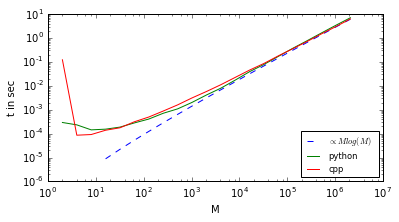

In [5]:
plt.figure(figsize=(6,3))
text='\\propto M log(M)'
a=np.logspace(1,21,num=21,base=2)
plt.loglog(a[3:],a[3:]*np.log(a[3:])/(0.5*10**7),"--", label= "$%s$  " %(text))
plt.loglog(a,time_python,label="python")
plt.loglog(a,time_cpp,label="cpp")
plt.xlabel('M',fontsize=10)
plt.ylabel('t in sec',fontsize=10)
plt.legend(loc=4,fontsize='small')
plt.savefig('midtermreport/data/profiling_length.png',dpi=300)   # save the figure to file 
plt.show()


In [24]:
print a[-1]
print time_cpp[-1]
b=1000000./(2**21)
print b
print time_cpp[-1]*b

2097152.0
6.60244703293
0.476837158203
3.14829208037


In [25]:
import scipy as sp
from scipy.interpolate import interp1d

new_length = 100
new_x = np.linspace(a.min(), a.max(), new_length)
new_y = sp.interpolate.interp1d(a, time_cpp, kind='linear')(new_x)

2.08142638206


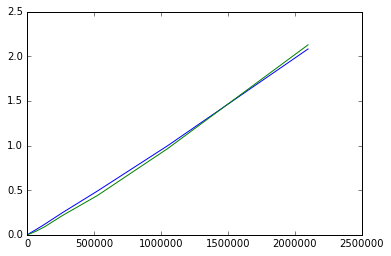

In [32]:
plt.plot(a[:],time_cpp[:],label="cpp")
plt.plot(a,time_python,label="python")

#plt.plot(new_x[:],new_y[:],label="cppneu")
print (time_cpp[-1]-time_cpp[2])

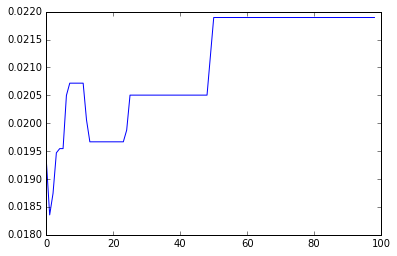

In [34]:
#plt.plot(new_y[:])
plt.plot(np.diff(new_y[:]))


in respect to particle number:

In [15]:
time_python=[]
time_cpp=[]
for i in np.logspace(1,11,num=20,base=2):
    timec=Timer(lambda: analyse_tool.Analyse(D=2,particles=int(i),length=1000,alpha=0.5,dt=1,version='cpp').compute_trajectory())
    timep=Timer(lambda: analyse_tool.Analyse(D=2,particles=int(i)*3,length=1000,alpha=0.5,dt=1).compute_trajectory())
    time_python.append(timep.timeit(number=1))
    time_cpp.append(timec.timeit(number=1))


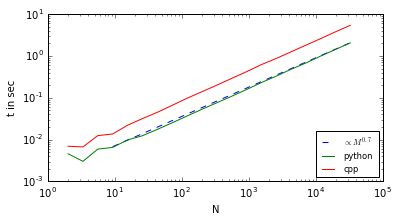

In [48]:
plt.figure(figsize=(6,3))
text='\propto M^{0.7}'
a=np.logspace(1,15,num=20,base=2)
b=a**(0.7)
plt.loglog(a[3:],b[3:]/(0.7*10**3),"--", label= "$%s$  " %(text))
plt.plot(a,time_python,label="python")
plt.plot(a,time_cpp,label="cpp")

plt.xlabel('N', fontsize=10)
plt.ylabel('t in sec', fontsize=10)
plt.legend(loc=4,fontsize='small')
plt.savefig('midtermreport/data/profiling_particle.png',dpi=300)   # save the figure to file 
plt.show()


In [ ]:
plt.plot(a,time_python,label="python")
plt.plot(a,time_cpp,label="cpp")

# Analyse:

python vs cpp

In [10]:
e=analyse_tool.Analyse(D=2,particles=5000,length=2000,alpha=0.5,dt=1)
msd,std=e.msd_ensemble()
d=analyse_tool.Analyse(D=2,particles=5000,length=2000,alpha=0.5,dt=1,version='cpp')
msd1,std1=d.msd_ensemble()


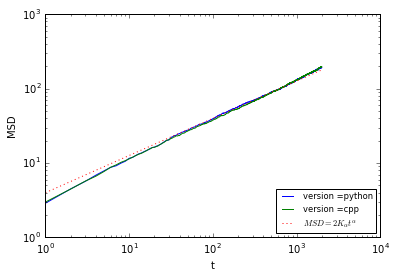

In [11]:
msd_text='MSD=2 K_\\alpha t^\\alpha'

plt.figure(figsize=(6,4))
plt.plot(e.t*e.dt, msd,label="version =%s" %(e.version))
plt.plot(d.t*d.dt, msd1 ,label="version =%s" %(d.version))
plt.loglog(d.t*d.dt,e.msdanalyt(),":", label="$%s$  " %(msd_text))
plt.xlabel('t', fontsize=10)
plt.ylabel('MSD', fontsize=10)
plt.legend(loc=4, fontsize='small')
plt.savefig('midtermreport/data/msd_python_cpp.png',dpi=300)   # save the figure to file 
plt.show()

## only cpp-version:

MSD  ensemble average vs time average vs time-ensemble-average:

In [3]:
d=analyse_tool.Analyse(D=2,particles=5000,length=3000,alpha=0.5,dt=1,version='cpp')
msd1,std1=d.msd_ensemble()
e=analyse_tool.Analyse(D=2,particles=1,length=8000,alpha=0.5,dt=1,version='cpp')
msd,std=e.msd_time()


0
1
2
3
4
5
6
7
8
9


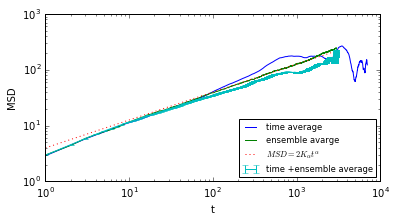

In [4]:
msd_text='MSD=2 K_\\alpha t^\\alpha'

plt.figure(figsize=(6,3))
plt.plot(e.t[:-1000]*e.dt, msd[:-1000],label="time average")
plt.plot(d.t*d.dt, msd1 ,label="ensemble avarge")
plt.loglog(d.t*d.dt,d.msdanalyt(),":", label="$%s$  " %(msd_text))
X=main.plot_ensemble_mean_of_time_msd()
plt.xlabel('t', fontsize=10)
plt.ylabel('MSD', fontsize=10)
plt.legend(loc=4, fontsize='small')
plt.savefig('midtermreport/data/averages_comparison.png',dpi=300)   # save the figure to file 
plt.show()

change dt:

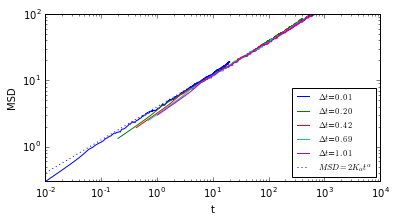

In [5]:
msd_text='MSD=2 K_\\alpha t^\\alpha'
t='t=\\Delta t \\cdot n'
colors=['r','b','g','k','c','w','b','r','g','b','k','c','w','b','r','g','b','k','c','w','bo','ro','go','bo','ko','co','wo','bo']
plt.figure(figsize=(6,3))

for i in (np.logspace(0,1,num=5,base=2)-0.99):
    e=analyse_tool.Analyse(D=2,particles=2000,length=2000,alpha=0.5,dt=i,version="cpp")
    msd,std=e.msd_ensemble()
    plt.plot(e.t*e.dt, msd,label="$\\Delta t$=$%.2f $" %(e.dt))

e=analyse_tool.Analyse(D=2,particles=2000,length=2000,alpha=0.5,dt=0.01,version="cpp")
plt.loglog(e.t*e.dt,e.msdanalyt(),":",color=colors[1], label="$%s$" %(msd_text))
plt.xlabel('t', fontsize=10)
plt.ylabel('MSD', fontsize=10)
plt.legend(loc=4, fontsize='small')
plt.ylim([0,100])
plt.savefig('midtermreport/data/dt_change.png',dpi=300)   # save the figure to file 

plt.show()

change alpha:

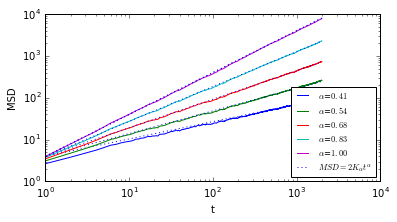

In [6]:
msd_text='MSD=2 K_\\alpha t^\\alpha'
t='t=\\Delta t \\cdot n'
colors=['r','b','g','k','c','w','b','r','g','b','k','c','w','b','r','g','b','k','c','w','bo','ro','go','bo','ko','co','wo','bo']
plt.figure(figsize=(6,3))
for i in (np.logspace(0.5,1,num=5,base=2)-1):
    e=analyse_tool.Analyse(D=2,particles=2000,length=2000,alpha=i,dt=1,version="cpp")
    msd,std=e.msd_ensemble()
    plt.plot(e.t*e.dt, msd,label="$\\alpha $=$%.2f $" %(e.alpha))
    plt.loglog(e.t*e.dt,e.msdanalyt(),":",color=colors[1])

plt.loglog(e.t*e.dt,e.msdanalyt(),":",color=colors[1], label="$%s$ " %(msd_text))
plt.xlabel('t', fontsize=10)
plt.ylabel('MSD', fontsize=10)
plt.legend(loc=4,fontsize='small')
plt.savefig('midtermreport/data/alpha_change.png',dpi=300)   # save the figure to file 

plt.show()

zeit rückwärts vs. vorwärt

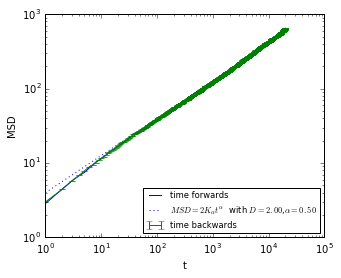

In [17]:
msd_text='MSD=2 K_\\alpha t^\\alpha'
t='t=\\Delta t \\cdot n'
colors=['r','b','g','k','c','w','b','r','g','b','k','c','w','b','r','g','b','k','c','w','bo','ro','go','bo','ko','co','wo','bo']
plt.figure(figsize=(5,4))
e=analyse_tool.Analyse(D=2,particles=5000,length=20000,alpha=0.5,dt=1)
msd,std=e.msd_ensemble()
plt.plot(e.t*e.dt, msd,label="time forwards")
plt.loglog(e.t*e.dt,e.msdanalyt(),":",color=colors[1], label="$%s$  with $D=%.2f$,$\\alpha=%.2f$" %(msd_text,e.D,e.alpha))
e.invert_time()
msd1,std1=e.msd_ensemble()
plt.errorbar(e.t*e.dt, msd1, yerr=msd1*0,label= "time backwards")
plt.xlabel('t', fontsize=10)
plt.ylabel('MSD', fontsize=10)
plt.legend(loc=4, fontsize='small')
plt.savefig('midtermreport/data/backwards.png',dpi=300)   # save the figure to file 

plt.show()


changing K_alpha

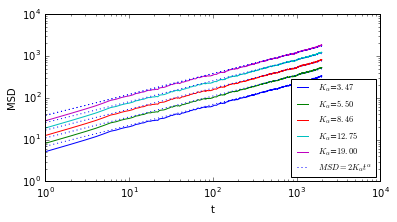

In [7]:
msd_text='MSD=2 K_\\alpha t^\\alpha'
t='t=\\Delta t \\cdot n'
colors=['r','b','g','k','c','w','b','r','g','b','k','c','w','b','r','g','b','k','c','w','bo','ro','go','bo','ko','co','wo','bo']
plt.figure(figsize=(6,3))
for i in (np.logspace(0.5,1,num=5,base=20)-1):
    e=analyse_tool.Analyse(D=i,particles=2000,length=2000,alpha=0.5,dt=1,version="cpp")
    msd,std=e.msd_ensemble()
    plt.plot(e.t*e.dt, msd,label="$K_\\alpha $=$%.2f $" %(e.D))
    plt.loglog(e.t*e.dt,e.msdanalyt(),":",color=colors[1])

plt.loglog(e.t*e.dt,e.msdanalyt(),":",color=colors[1], label="$%s$ " %(msd_text))
plt.xlabel('t', fontsize=10)
plt.ylabel('MSD', fontsize=10)
plt.legend(loc=4,fontsize='small')
plt.savefig('midtermreport/data/K_alpha_change.png',dpi=300)   # save the figure to file 

plt.show()

fractional brownian scaling:

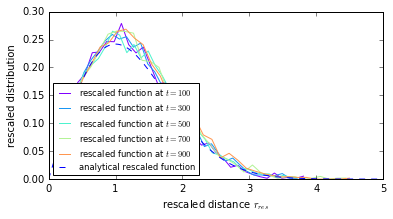

In [8]:
plt.figure(figsize=(6,3))
main.show_rescaled()
   # save the figure to file 


non-gaussian parameter:

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


analyse_tool.py:133: RuntimeWarning: invalid value encountered in divide
  nongaussianparamter=(1/3.)*moment4/moment2poten2-1


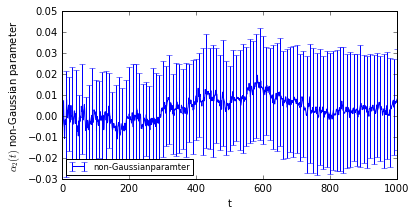

In [9]:
plt.figure(figsize=(6,3))
main.show_gaussian()

Show ,vor explain, how this amrocivan aproximation trick changes outcome
change git branch to no correction: will not work for both plots!!!!

In [3]:
e=analyse_tool.Analyse(D=2,particles=5000,length=2000,alpha=0.5,dt=1,version="cpp")
msd,std=e.msd_ensemble()

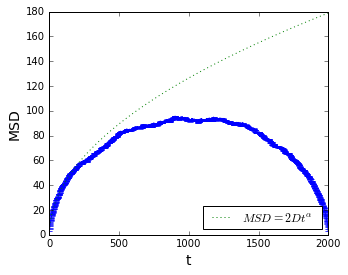

In [11]:
msd_text='MSD=2 D t^\\alpha'

plt.figure(figsize=(10,3))
plt.plot(e.t*e.dt, msd)
#plt.errorbar(d.t*d.dt, msd1, yerr=std1*0,label="version =%s" %(d.version))
plt.plot(e.t*e.dt,e.msdanalyt(),":", label="$%s$  " %(msd_text))
plt.xlabel('t', fontsize=10)
plt.ylabel('MSD', fontsize=10)
plt.legend(loc=4, fontsize='small')
plt.savefig('midtermreport/data/nocorrectionmsd.png',dpi=300)   # save the figure to file 
plt.show()

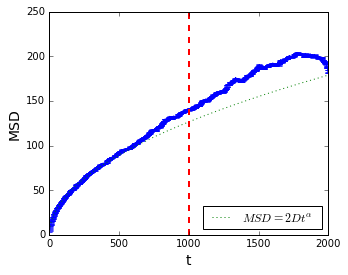

In [15]:
msd_text='MSD=2 D t^\\alpha'

plt.figure(figsize=(10,3))
plt.plot(e.t*e.dt, msd)
#plt.errorbar(d.t*d.dt, msd1, yerr=std1*0,label="version =%s" %(d.version))
plt.plot(e.t*e.dt,e.msdanalyt(),":", label="$%s$  " %(msd_text))
plt.axvline(x=1000, linewidth=2, color="r" ,ls="--")
plt.xlabel('t', fontsize=10)
plt.ylabel('MSD', fontsize=10)
plt.legend(loc=4,fontsize='small')
plt.savefig('midtermreport/data/withcorrection_nocutoff.png',dpi=300)   # save the figure to file 
plt.show()